In [23]:
import pandas as pd
import numpy as np

In [24]:
births = pd.read_csv('births.csv')

In [25]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [26]:
births['decade'] = (births['year'] // 10) * 10

In [27]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [28]:
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [29]:
%matplotlib inline
import matplotlib.pyplot as pp

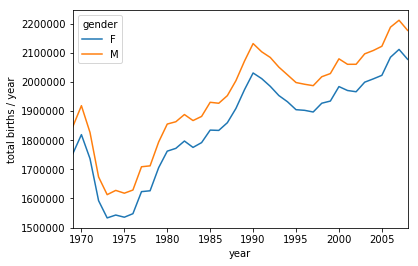

In [30]:
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
pp.ylabel('total births / year')

In [31]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [32]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [33]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [34]:
births['day'] = births['day'].astype(int)

In [35]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [36]:
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, format = '%Y%m%d')

In [37]:
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [38]:
births['dayofweek'] = births.index.dayofweek

In [39]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


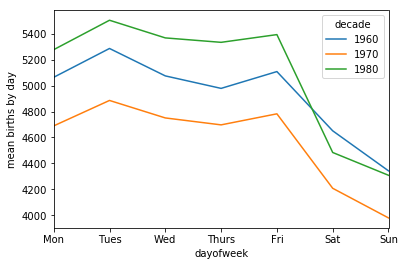

In [40]:
births.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot()
pp.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
pp.ylabel('mean births by day')

In [41]:
births_by_date = births.pivot_table('births',[births.index.month,births.index.day])
births_by_date.head()

1  1    4009.225
   2    4247.400
   3    4500.900
   4    4571.350
   5    4603.625
Name: births, dtype: float64

In [42]:
births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]
births_by_date.head()

2012-01-01    4009.225
2012-01-02    4247.400
2012-01-03    4500.900
2012-01-04    4571.350
2012-01-05    4603.625
Name: births, dtype: float64

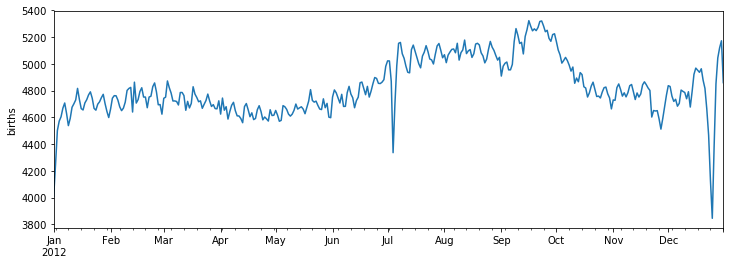

In [43]:
births_by_date.plot(figsize=(12,4))
pp.ylabel('births')


In [44]:
from datetime import datetime